In [69]:
import pandas as pd
import matplotlib.pyplot as plt

from deep_hvac.util import NsrdbReader
from deep_hvac import postprocess

In [2]:
ls ../data

1704559_29.72_-95.35_2018.csv  ercot-2019-rt.xlsx
1704559_29.72_-95.35_2019.csv  houston-2018-prices.pickle
DefaultBuilding-v0/            houston-2019-prices.pickle
ercot-2018-rt.xlsx             results-expert.pickle


In [53]:
prices_2018 = pd.read_pickle('../data/houston-2018-prices.pickle').resample('1H').mean()
prices_2019 = pd.read_pickle('../data/houston-2019-prices.pickle').resample('1H').mean()
weather_2018 = NsrdbReader('../data/1704559_29.72_-95.35_2018.csv').weather_hourly
weather_2019 = NsrdbReader('../data/1704559_29.72_-95.35_2019.csv').weather_hourly

In [32]:
prices_2018['Settlement Point Price Next'] = prices_2018['Settlement Point Price'].shift(-1)
prices_2018['Settlement Point Price Next'].ffill(inplace=True)
diff = prices_2018['Settlement Point Price Next'] - prices_2018['Settlement Point Price']
prices_2018['pct_change'] = diff / prices_2018['Settlement Point Price'].abs()
prices_2018['diff'] = diff

<AxesSubplot:>

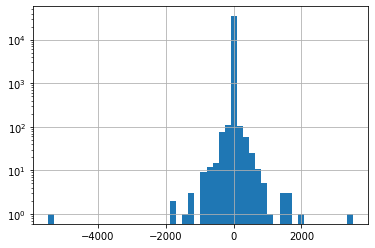

In [47]:
prices_2018['diff'].hist(bins=50, log=True)
# plt.xscale('log')

Text(0.5, 1.0, 'ERCOT prices, summer')

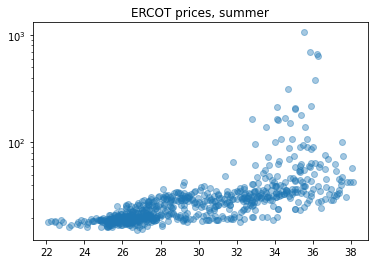

In [67]:
plt.scatter(weather_2018['Temperature'].iloc[7*24*30:8*24*30],
            prices_2018['Settlement Point Price'].iloc[7*24*30:8*24*30],
            alpha=0.4)
plt.yscale('log')
plt.title("ERCOT prices, summer")

In [ ]:
postprocess()